In [2]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [4]:
df_loan=pd.read_csv('loan_data_set.csv')
df_loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Check for null values

In [5]:
df_loan.shape

(614, 13)

In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df_loan.duplicated().sum()

np.int64(0)

In [9]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_loan['Gender']=df_loan['Gender'].fillna(str(df_loan['Gender'].mode()))
df_loan['Married']=df_loan['Married'].fillna(str(df_loan['Married'].mode()))
#df_loan['Dependents']=df_loan['Dependents'].fillna(str(df_loan['Dependents'].mode()))
df_loan['Self_Employed']=df_loan['Self_Employed'].fillna(str(df_loan['Self_Employed'].mode()))
df_loan['LoanAmount']=df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].median())
df_loan['Loan_Amount_Term']=df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].median())
df_loan['Credit_History']=df_loan['Credit_History'].fillna(df_loan['Credit_History'].median())

df_loan.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#remove or convert "3+" to 3
df_loan['Dependents'] = df_loan['Dependents'].astype(str).str.replace('+', '', regex=False)
df_loan['Dependents'] = pd.to_numeric(df_loan['Dependents'], errors='coerce')
df_loan['Dependents']=df_loan['Dependents'].fillna(df_loan['Dependents'].median())
df_loan['Dependents'] = df_loan['Dependents'].astype(int)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [12]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Scale and made object to numeric

In [46]:
scaler=StandardScaler()
scaler1=StandardScaler()
columns_to_normalize = [ 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
df_loan[columns_to_normalize] = scaler1.fit_transform(df_loan[columns_to_normalize])
df_loan['ApplicantIncome']=scaler.fit_transform(df_loan[['ApplicantIncome']])

In [47]:
df_loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,0.072991,-0.554487,-0.211241,0.273231,1.0,0,1
1,LP001003,0,1,1,1,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,1,0
2,LP001005,0,1,0,1,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,0,1
3,LP001006,0,1,0,0,0,-0.462062,0.251980,-0.306435,0.273231,1.0,0,1
4,LP001008,0,0,0,1,0,0.097728,-0.554487,-0.056551,0.273231,1.0,0,1
5,LP001011,0,1,2,1,1,0.002218,0.880600,1.442758,0.273231,1.0,0,1
6,LP001013,0,1,0,0,0,-0.503019,-0.035995,-0.603917,0.273231,1.0,0,1
7,LP001014,0,1,3,1,0,-0.387850,0.301914,0.145737,0.273231,0.0,2,0
8,LP001018,0,1,2,1,0,-0.228939,-0.032575,0.264730,0.273231,1.0,0,1
9,LP001020,0,1,1,1,0,1.218457,3.196713,2.418499,0.273231,1.0,2,0


In [15]:
df_loan['Gender'].unique()

array(['Male', 'Female', '0    Male\nName: Gender, dtype: object'],
      dtype=object)

In [16]:
print((df_loan['Gender']=='0    Male\nName: Gender, dtype: object').sum())

13


In [17]:
df_loan['Married'].unique()

array(['No', 'Yes', '0    Yes\nName: Married, dtype: object'],
      dtype=object)

In [18]:
df_loan['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [19]:
df_loan['Self_Employed'].unique()

array(['No', 'Yes', '0    No\nName: Self_Employed, dtype: object'],
      dtype=object)

In [20]:
df_loan['Property_Area'].unique()


array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
df_loan['Loan_Status'].unique()


array(['Y', 'N'], dtype=object)

In [36]:
df_loan['Self_Employed'].unique()


array([0, 1])

In [41]:
df_loan['Gender']=df_loan['Gender'].replace({'Male':0,'Female':1,'0    Male\nName: Gender, dtype: object':0})
df_loan['Gender'] = df_loan['Gender'].astype(int)
df_loan['Married']=df_loan['Married'].replace({'No':0,'Yes':1,'0    Yes\nName: Married, dtype: object':1})
df_loan['Married'] = df_loan['Married'].astype(int)
df_loan['Self_Employed']=df_loan['Self_Employed'].replace({'No':0,'Yes':1,'0    No\nName: Self_Employed, dtype: object':0})
df_loan['Self_Employed'] = df_loan['Self_Employed'].astype(int)
df_loan['Property_Area']=df_loan['Property_Area'].replace({'Urban':0,'Rural':1,'Semiurban':2})
df_loan['Property_Area'] = df_loan['Property_Area'].astype(int)
df_loan['Loan_Status']=df_loan['Loan_Status'].replace({'N':0,'Y':1})
df_loan['Loan_Status'] = df_loan['Loan_Status'].astype(int)
df_loan['Education']=df_loan['Education'].replace({'Not Graduate':0,'Graduate':1})
df_loan['Education'] = df_loan['Education'].astype(int)

In [24]:
df_loan.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,0.072991,-0.554487,-0.211241,0.273231,1.0,0,1
1,LP001003,0,1,1,1,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,1,0
2,LP001005,0,1,0,1,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,0,1
3,LP001006,0,1,0,0,0,-0.462062,0.251980,-0.306435,0.273231,1.0,0,1
4,LP001008,0,0,0,1,0,0.097728,-0.554487,-0.056551,0.273231,1.0,0,1
5,LP001011,0,1,2,1,1,0.002218,0.880600,1.442758,0.273231,1.0,0,1
6,LP001013,0,1,0,0,0,-0.503019,-0.035995,-0.603917,0.273231,1.0,0,1
7,LP001014,0,1,3,1,0,-0.387850,0.301914,0.145737,0.273231,0.0,2,0
8,LP001018,0,1,2,1,0,-0.228939,-0.032575,0.264730,0.273231,1.0,0,1
9,LP001020,0,1,1,1,0,1.218457,3.196713,2.418499,0.273231,1.0,2,0


<Axes: >

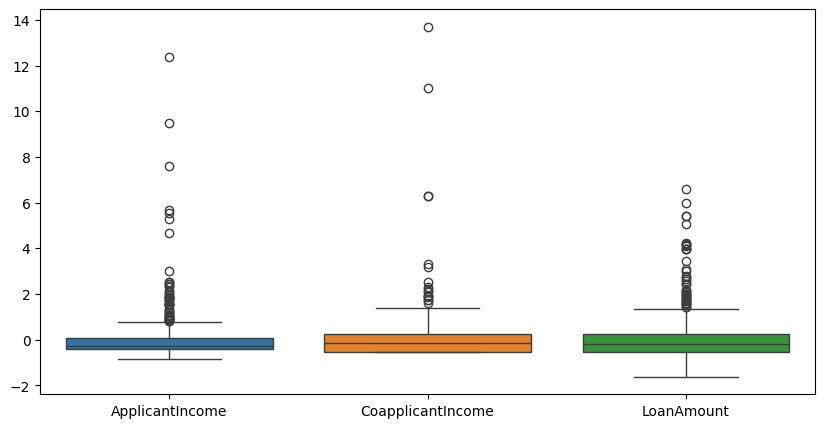

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_loan[['ApplicantIncome', 'CoapplicantIncome','LoanAmount',]])

In [26]:
numeric_loan_df=df_loan.select_dtypes(include=[float,int])
numeric_loan_df
# numeric_df=df.select_dtypes(include=[float,int])
# numeric_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,0.072991,-0.554487,-0.211241,0.273231,1.0,0,1
1,0,1,1,1,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,1,0
2,0,1,0,1,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,0,1
3,0,1,0,0,0,-0.462062,0.251980,-0.306435,0.273231,1.0,0,1
4,0,0,0,1,0,0.097728,-0.554487,-0.056551,0.273231,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,-0.410130,-0.554487,-0.889500,0.273231,1.0,1,1
610,0,1,3,1,0,-0.212557,-0.554487,-1.258378,-2.522836,1.0,1,1
611,0,1,1,1,0,0.437174,-0.472404,1.276168,0.273231,1.0,0,1
612,0,1,2,1,0,0.357064,-0.554487,0.490816,0.273231,1.0,0,1


In [38]:
numeric_loan_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.781759,0.133550,-4.339634e-18,4.050325e-17,-2.603780e-17,5.930833e-17,0.855049,1.050489,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,0.352339,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,-8.606493e-01,-5.544873e-01,-1.627255e+00,-5.132498e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,-4.138159e-01,-5.544873e-01,-5.414462e-01,2.732313e-01,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,-2.606393e-01,-1.480047e-01,-2.112412e-01,2.732313e-01,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,6.414426e-02,2.312023e-01,2.260572e-01,2.732313e-01,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.238462e+01,1.369617e+01,6.595146e+00,2.137276e+00,1.000000,2.000000,1.000000


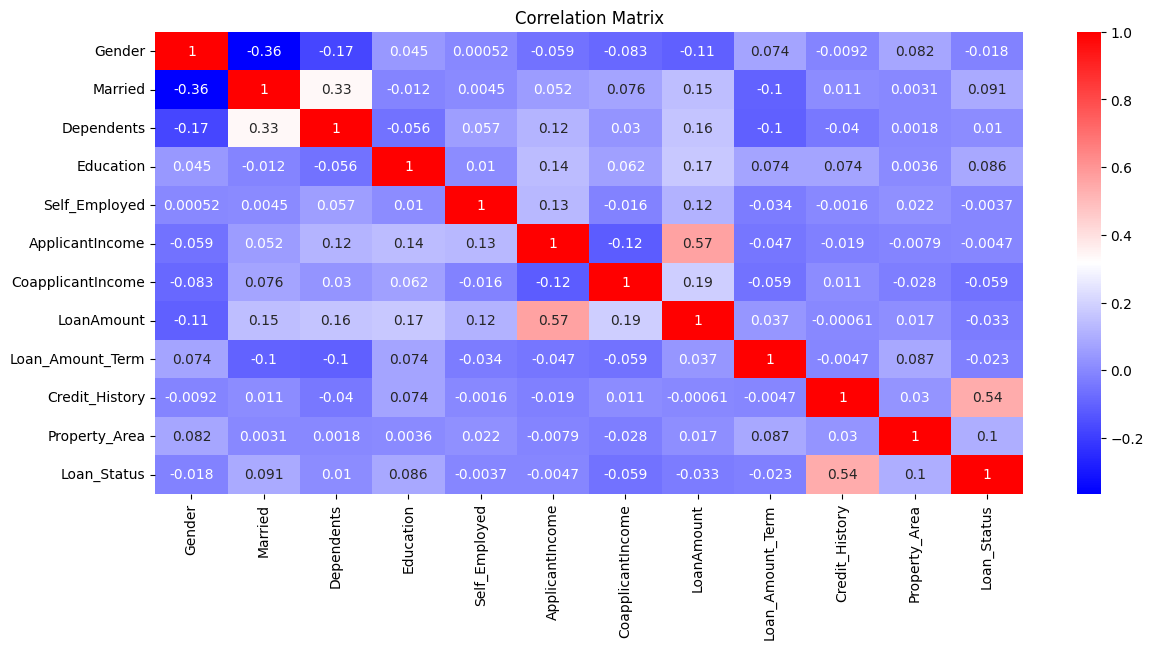

In [27]:
plt.figure(figsize=(14,6))
sns.heatmap(numeric_loan_df.corr(),annot=True,cmap='bwr')
plt.title("Correlation Matrix")
plt.show()

In [28]:
target=numeric_loan_df['Loan_Status']
# features=numeric_loan_df[['Credit_History','Property_Area','Married','Education','Dependents']]
features=numeric_loan_df[['Credit_History','Property_Area','Married','Education','Dependents','Self_Employed','ApplicantIncome']]

In [29]:
x_train, x_test,y_train, y_test=train_test_split(features,target,test_size=0.2)

In [30]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('prediction: ',prediction)
print('test : ',[i for i in y_test])
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy * 100:.2f}%")

prediction:  [1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 0]
test :  [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1]
Accuracy: 78.86%


## Dump code

In [31]:
joblib.dump(model,'loan_pridiction_model_joblib')

['loan_pridiction_model_joblib']

In [32]:
loan_model=joblib.load('loan_pridiction_model_joblib')

In [33]:
loan_model.predict([[1,1.0,0,0,0,0,0]])

/home/svont-0/anaconda3/envs/dsfs/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [34]:
[1,1.0,1,1,0,1,0.437102]

[1, 1.0, 1, 1, 0, 1, 0.437102]

In [49]:
joblib.dump(scaler, 'scaler1.joblib')

['scaler1.joblib']